In [1]:
%load_ext lab_black

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


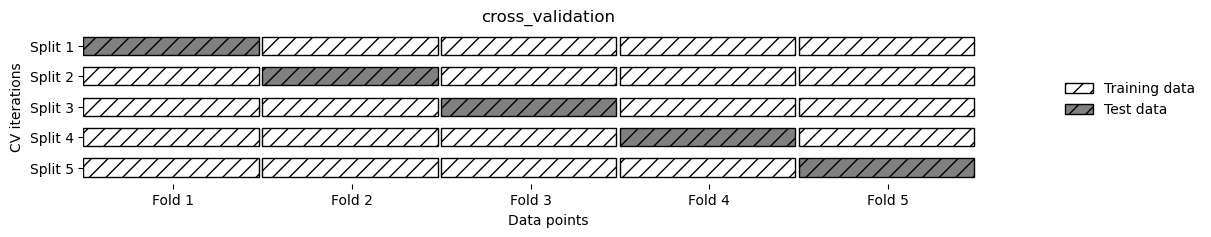

In [3]:
import mglearn

mglearn.plots.plot_cross_validation()

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# cv: number of folds
scores = cross_val_score(logreg, iris.data, iris.target, cv=7)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.95454545 1.         0.90909091 0.95238095 0.95238095 1.
 1.        ]


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [6]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


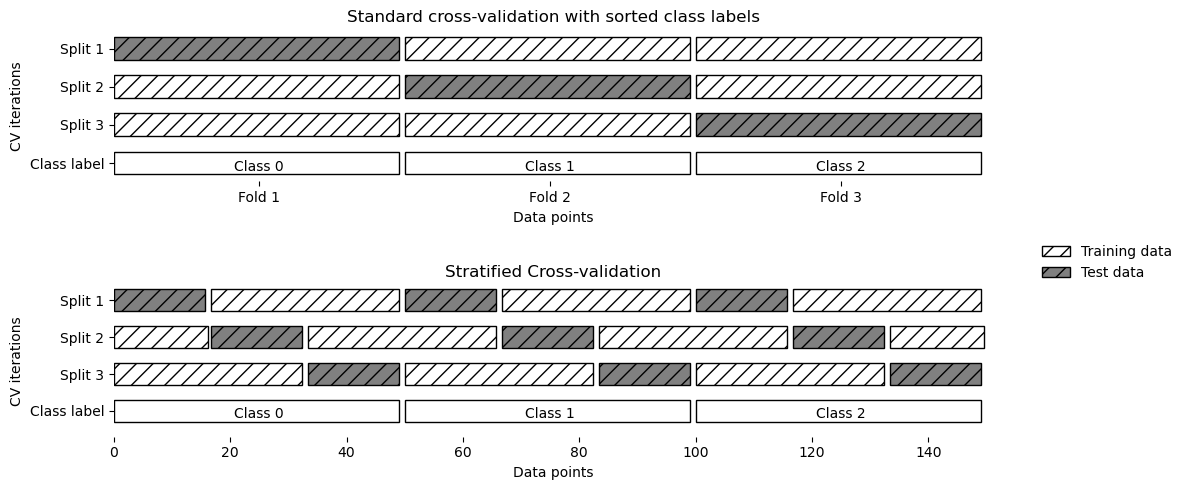

In [8]:
mglearn.plots.plot_stratified_cross_validation()

n_samples_per_fold:  50.0
[49.0, 49.0, 49.0]
[49.0, 49.0, 49.0]
[49.0, 49.0, 49.0]


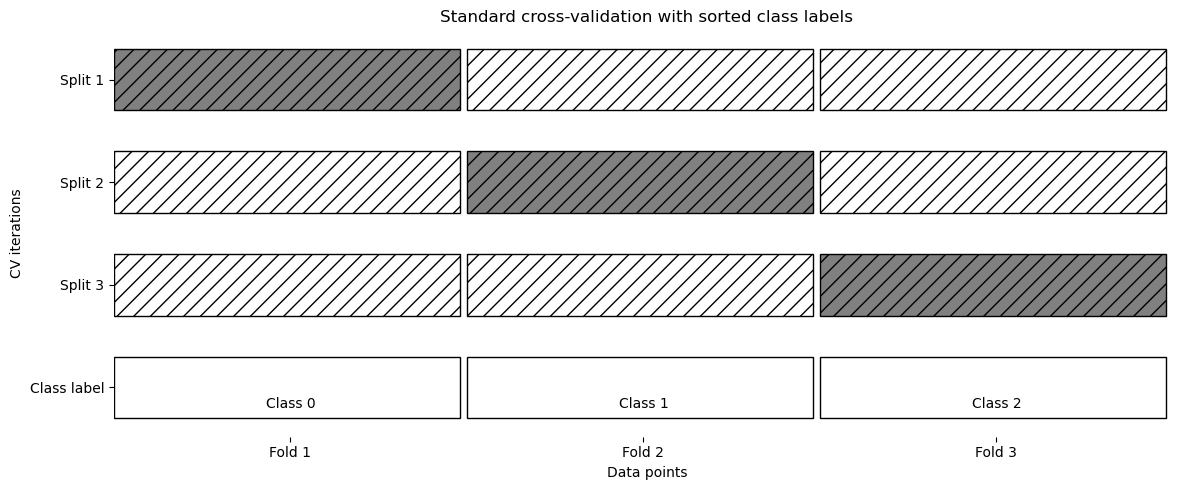

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, both_axes = plt.subplots(1, 1, figsize=(12, 5))
axes = both_axes
axes.set_title("Standard cross-validation with sorted class labels")

axes.set_frame_on(False)

n_folds = 3
n_samples = 150

n_samples_per_fold = n_samples / float(n_folds)

print("n_samples_per_fold: ", n_samples_per_fold)
for i in range(n_folds):
    colors = ["w"] * n_folds
    colors[i] = "grey"
    print([n_samples_per_fold - 1] * n_folds)
    axes.barh(
        y=range(n_folds),
        width=[n_samples_per_fold - 1] * n_folds,
        left=i * n_samples_per_fold,
        height=0.6,
        color=colors,
        hatch="//",
        edgecolor="k",
        align="edge",
    )

axes.barh(
    y=[n_folds] * n_folds,
    width=[n_samples_per_fold - 1] * n_folds,
    left=np.arange(3) * n_samples_per_fold,
    height=0.6,
    color="w",
    edgecolor="k",
    align="edge",
)

axes.invert_yaxis()
axes.set_xlim(0, n_samples + 1)
axes.set_ylabel("CV iterations")
axes.set_xlabel("Data points")
axes.set_xticks(np.arange(n_samples_per_fold / 2.0, n_samples, n_samples_per_fold))
axes.set_xticklabels(["Fold %d" % x for x in range(1, n_folds + 1)])
axes.set_yticks(np.arange(n_folds + 1) + 0.3)
axes.set_yticklabels(["Split %d" % x for x in range(1, n_folds + 1)] + ["Class label"])
for i in range(3):
    axes.text(
        (i + 0.5) * n_samples_per_fold,
        3.5,
        "Class %d" % i,
        horizontalalignment="center",
    )

fig.tight_layout()

n_folds:  3
n_samples_per_fold:  50.0
n_subsplit:  16.666666666666668
y=[i] * n_folds [0, 0, 0]
width=[n_subsplit - 1] * n_folds [15.666666666666668, 15.666666666666668, 15.666666666666668]
left=np.arange(n_folds) * n_samples_per_fold + i * n_subsplit [  0.  50. 100.]
y=[i] * n_folds [1, 1, 1]
width=[n_subsplit - 1] * n_folds [15.666666666666668, 15.666666666666668, 15.666666666666668]
left=np.arange(n_folds) * n_samples_per_fold + i * n_subsplit [ 16.66666667  66.66666667 116.66666667]
y=[i] * n_folds [2, 2, 2]
width=[n_subsplit - 1] * n_folds [15.666666666666668, 15.666666666666668, 15.666666666666668]
left=np.arange(n_folds) * n_samples_per_fold + i * n_subsplit [ 33.33333333  83.33333333 133.33333333]


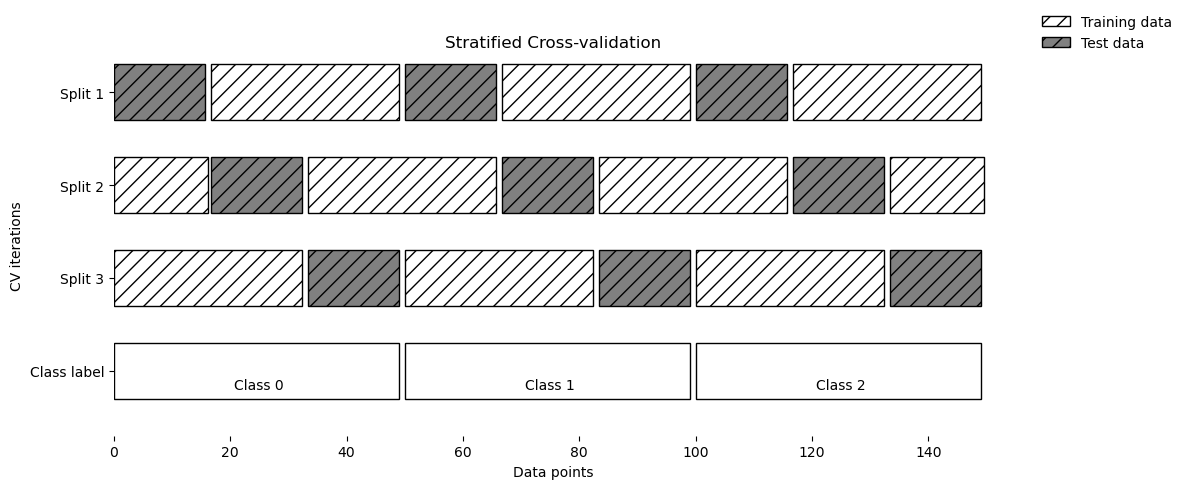

In [10]:
fig, both_axes = plt.subplots(1, 1, figsize=(12, 5))
ax = both_axes
ax.set_title("Stratified Cross-validation")
ax.set_frame_on(False)
ax.invert_yaxis()
ax.set_xlim(0, n_samples + 1)
ax.set_ylabel("CV iterations")
ax.set_xlabel("Data points")

ax.set_yticks(np.arange(n_folds + 1) + 0.3)
ax.set_yticklabels(["Split %d" % x for x in range(1, n_folds + 1)] + ["Class label"])

n_subsplit = n_samples_per_fold / 3.0
print("n_folds: ", n_folds)  # 3
print("n_samples_per_fold: ", n_samples_per_fold)  # 50
print("n_subsplit: ", n_subsplit)  # 16.666666666666668
for i in range(n_folds):
    print("y=[i] * n_folds", [i] * n_folds)
    print("width=[n_subsplit - 1] * n_folds", [n_subsplit - 1] * n_folds)
    print(
        "left=np.arange(n_folds) * n_samples_per_fold + i * n_subsplit",
        np.arange(n_folds) * n_samples_per_fold + i * n_subsplit,
    )
    test_bars = ax.barh(
        y=[i] * n_folds,
        width=[n_subsplit - 1] * n_folds,
        left=np.arange(n_folds) * n_samples_per_fold + i * n_subsplit,
        height=0.6,
        color="grey",
        hatch="//",
        edgecolor="k",
        align="edge",
    )

w = 2 * n_subsplit - 1
ax.barh(
    y=[0] * n_folds,
    width=[w] * n_folds,
    left=np.arange(n_folds) * n_samples_per_fold + (0 + 1) * n_subsplit,
    height=0.6,
    color="w",
    hatch="//",
    edgecolor="k",
    align="edge",
)
ax.barh(
    y=[1] * (n_folds + 1),
    width=[w / 2.0, w, w, w / 2.0],
    left=np.maximum(0, np.arange(n_folds + 1) * n_samples_per_fold - n_subsplit),
    height=0.6,
    color="w",
    hatch="//",
    edgecolor="k",
    align="edge",
)
training_bars = ax.barh(
    y=[2] * n_folds,
    width=[w] * n_folds,
    left=np.arange(n_folds) * n_samples_per_fold,
    height=0.6,
    color="w",
    hatch="//",
    edgecolor="k",
    align="edge",
)

ax.barh(
    y=[n_folds] * n_folds,
    width=[n_samples_per_fold - 1] * n_folds,
    left=np.arange(n_folds) * n_samples_per_fold,
    height=0.6,
    color="w",
    edgecolor="k",
    align="edge",
)

for i in range(3):
    ax.text(
        (i + 0.5) * n_samples_per_fold,
        3.5,
        "Class %d" % i,
        horizontalalignment="center",
    )
ax.set_ylim(4, -0.1)
plt.legend(
    [training_bars[0], test_bars[0]],
    ["Training data", "Test data"],
    loc=(1.05, 1),
    frameon=False,
)

fig.tight_layout()

In [11]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

In [12]:
print(
    "Cross-validation scores:\n{}".format(
        cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    )
)

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [13]:
kfold = KFold(n_splits=3)
print(
    "Cross-validation scores:\n{}".format(
        cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    )
)

Cross-validation scores:
[0. 0. 0.]


In [14]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print(
    "Cross-validation scores:\n{}".format(
        cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    )
)

Cross-validation scores:
[0.98 0.96 0.96]


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [15]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print(
    "Cross-validation scores:\n{}".format(
        cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    )
)

Cross-validation scores:
[0.98 0.96 0.96]


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [16]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Number of cv iterations:  150
Mean accuracy: 0.97


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

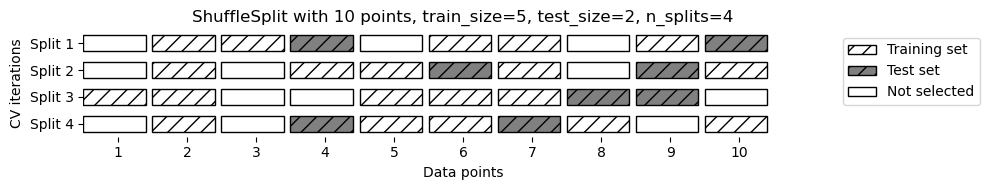

In [17]:
mglearn.plots.plot_shuffle_split()

In [18]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Cross-validation scores:
[0.97333333 0.97333333 0.97333333 0.96       0.96       0.96
 0.97333333 0.92       0.97333333 0.90666667]


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.model_selection import GroupKFold

# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


In [20]:
# naive grid search implementation
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0
)
print(
    "Size of training set: {} size of test set: {}".format(
        X_train.shape[0], X_test.shape[0]
    )
)
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


In [21]:
from sklearn.svm import SVC

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0
)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1
)
print(
    "Size of training set: {} size of validation set: {} size of test set:"
    " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0])
)
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}

Size of training set: 84 size of validation set: 28 size of test set: 38



In [22]:
# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


In [23]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

In [24]:
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "gamma": [0.001, 0.01, 0.1, 1, 10, 100],
}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0
)

In [27]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [28]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [29]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [30]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, gamma=0.1)


In [32]:
import pandas as pd

# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())
type(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000318,0.000066,0.000166,0.000024,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000241,0.000012,0.000136,0.000008,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000239,0.000004,0.000133,0.000001,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000239,0.000005,0.000132,0.000003,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000235,0.000011,0.000130,0.000005,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


dict

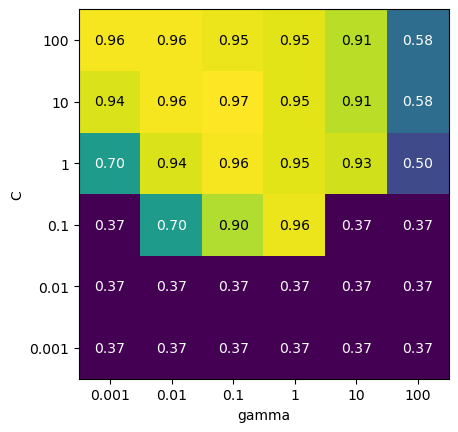

In [33]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(
    scores,
    xlabel="gamma",
    xticklabels=param_grid["gamma"],
    ylabel="C",
    yticklabels=param_grid["C"],
    cmap="viridis",
)

[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.119512 0.607464 0.540218 1.      ]
[0.688944 0.865448 0.182725 1.      ]
[0.926106 0.89733  0.104071 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.119512 0.607464 0.540218 1.      ]
[0.85581  0.888601 0.097452 1.      ]
[0.964894 0.902323 0.123941 1.      ]
[0.886271 0.892374 0.095374 1.      ]
[0.814576 0.883393 0.110347 1.      ]
[0.243113 0.292092 0.538516 1.      ]
[0.85581  0.888601 0.097452 1.      ]
[0.964894 0.902323 0.123941 1.      ]
[0.993248 0.

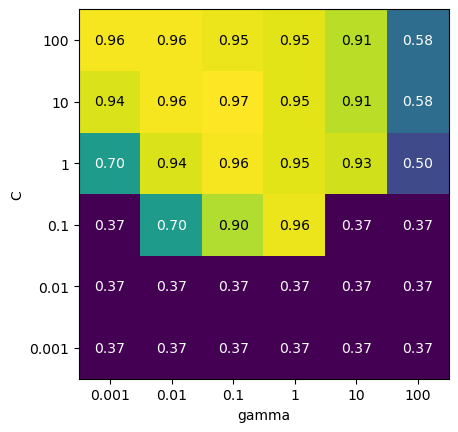

In [59]:
xlabel = "gamma"
ylabel = "C"
xticklabels = param_grid["gamma"]
yticklabels = param_grid["C"]
cmap = "viridis"
ax = plt.gca()
# plot the mean cross-validation scores
img = ax.pcolor(scores, cmap=cmap)
img.update_scalarmappable()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xticks(np.arange(len(xticklabels)) + 0.5)
ax.set_yticks(np.arange(len(yticklabels)) + 0.5)
ax.set_xticklabels(xticklabels)
ax.set_yticklabels(yticklabels)
ax.set_aspect(1)
for p, color, value in zip(img.get_paths(), img.get_facecolors(), img.get_array()):
    x, y = p.vertices[:-2, :].mean(0)
    if np.mean(color[:3]) > 0.5:
        c = "k"
    else:
        c = "w"
    ax.text(x, y, "%0.2f" % value, color=c, ha="center", va="center")

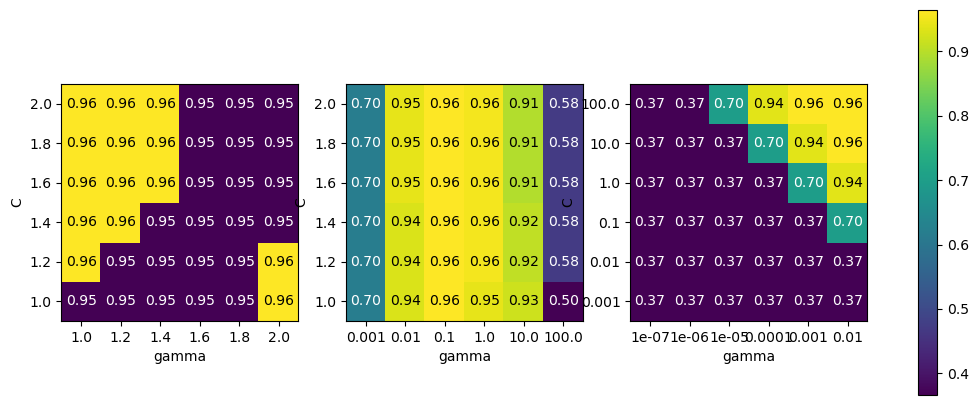

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {"C": np.linspace(1, 2, 6), "gamma": np.linspace(1, 2, 6)}
param_grid_one_log = {"C": np.linspace(1, 2, 6), "gamma": np.logspace(-3, 2, 6)}
param_grid_range = {"C": np.logspace(-3, 2, 6), "gamma": np.logspace(-7, -2, 6)}
for param_grid, ax in zip(
    [param_grid_linear, param_grid_one_log, param_grid_range], axes
):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_["mean_test_score"].reshape(6, 6)
    scores_image = mglearn.tools.heatmap(
        scores,
        xlabel="gamma",
        ylabel="C",
        xticklabels=param_grid["gamma"],
        yticklabels=param_grid["C"],
        cmap="viridis",
        ax=ax,
    )
plt.colorbar(scores_image, ax=axes.tolist())